In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pill-image-analysis/allImages
/kaggle/input/pill-image-analysis/threshold
/kaggle/input/pill-image-analysis/ld50values.csv


In [ ]:
og = pd.read_csv("../input/pill-image-analysis/allImages")
thresh = pd.read_csv("../input/pill-image-analysis/threshold")

In [ ]:
counts1 = og['Name'].value_counts()
counts2 = thresh["Name"].value_counts()
counts1

lisinopril                       180
warfarin sodium                  134
simvastatin                      130
gabapentin                       127
levothyroxine sodium             111
                                ... 
stendra                            1
metformin hcl                      1
valganciclovir                     1
onceamonth risedronate sodium      1
hctz let                           1
Name: Name, Length: 1527, dtype: int64

In [ ]:
counts1.std()

15.340725480332788

In [ ]:
counts2.std()

23.73473588410315

In [ ]:
counts1.mean()

10.489194499017682

In [ ]:
counts2.mean()

38.18260869565217

In [ ]:
len(og["Name"])

16017

In [ ]:
counts2

lisinopril                           180
warfarin sodium                      134
simvastatin                          130
gabapentin                           127
levothyroxine sodium                 111
                                    ... 
fosinopril sodium                     18
ofloxacin                             18
sulfamethoxazole and trimethoprim     18
hydroxyzine pam                       18
lorazepam                             18
Name: Name, Length: 230, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

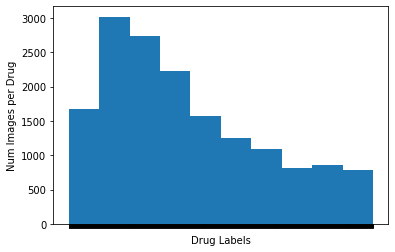

In [ ]:
ax1 = plt.axes()
#x_axis = ax1.axes.get_xaxis()
#x_axis.set_visible(False)
ax1.set_xticklabels([])
plt.xlabel("Drug Labels")
plt.ylabel("Num Images per Drug")
plt.hist(og['Name'])
plt.show()

In [ ]:
plt.savefig("withoutThreshold.png")

<Figure size 432x288 with 0 Axes>

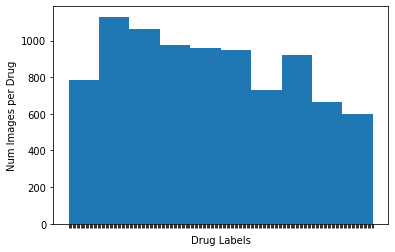

In [ ]:
ax1 = plt.axes()
ax1.set_xticklabels([])
plt.xlabel("Drug Labels")
plt.ylabel("Num Images per Drug")
plt.hist(thresh['Name'])
plt.show()

In [ ]:
ld50 = pd.read_csv("/kaggle/input/pill-image-analysis/ld50values.csv")
ld50.drop(ld50.tail(1).index,inplace=True)
ld50['LD50'] = ld50['LD50'].astype('float')

All LD50


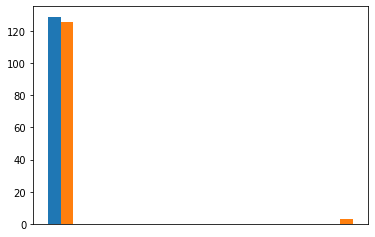

In [ ]:
ax2 = plt.axes()
ax2.set_xticklabels([])
print("All LD50")
plt.hist(ld50)
plt.show()

In [ ]:
#ld50
ld502 = ld50.loc[ld50['LD50'] <= 300]
#ld502
ld503 = ld50.loc[ld50['LD50'] > 300]
print(ld50.size, ld502.size, ld503.size)

258 70 188


LD50 <= 300


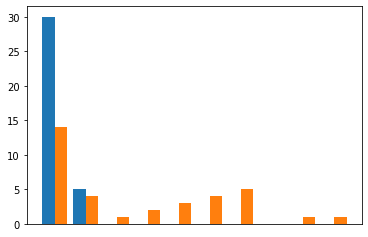

In [ ]:
ax2 = plt.axes()
ax2.set_xticklabels([])
print("LD50 <= 300")
plt.hist(ld502)
plt.show()

In [ ]:
plt.savefig("ld50toxictyhist.png")

<Figure size 432x288 with 0 Axes>

LD50 > 300


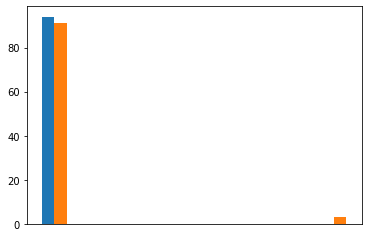

In [ ]:
ax2 = plt.axes()
ax2.set_xticklabels([])
print("LD50 > 300")
plt.hist(ld503)
plt.show()

LD50 <= 300mg/kg


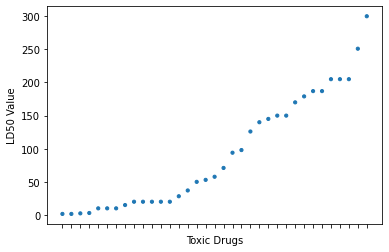

In [ ]:
ax2 = plt.axes()
ax2.set_xticklabels([])
plt.xlabel("Toxic Drugs")
plt.ylabel("LD50 Value")
s = [10*1**n for n in range(len(ld502["Name"]))]
print("LD50 <= 300mg/kg")
plt.scatter(ld502["Name"], ld502["LD50"], s=s)
plt.show()

In [ ]:
plt.savefig("ld50toxic.png")

<Figure size 432x288 with 0 Axes>

LD50 > 300mg/kg


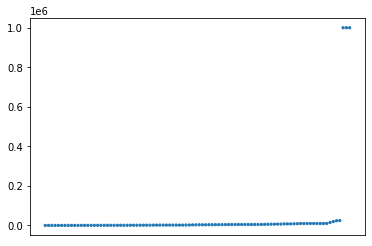

In [ ]:
ax2 = plt.axes()
x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)
s = [5*1**n for n in range(len(ld503["Name"]))]
print("LD50 > 300mg/kg")
plt.scatter(ld503["Name"], ld503["LD50"], s=s)
plt.show()

All LD50


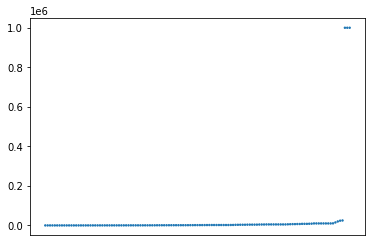

In [ ]:
ax2 = plt.axes()
x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)
s = [2*1**n for n in range(len(ld50["Name"]))]
print("All LD50")
plt.scatter(ld50["Name"], ld50["LD50"], s=s)
plt.show()